<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Manipulação;</li>
  <li>Visualização;</li>
  <li>Storytelling.</li>
</ol>


---

# **Exercícios**

Este *notebook* deve servir como um guia para **você continuar** a construção da sua própria análise exploratória de dados. Fique a vontate para copiar os códigos da aula mas busque explorar os dados ao máximo. Por fim, publique seu *notebook* no [Kaggle](https://www.kaggle.com/).

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

Escreva uma breve descrição do problema.

## 2\. Pacotes e bibliotecas

In [1]:
# importe todas as suas bibliotecas aqui, siga os padrões do PEP8:
#
# - 1º pacotes nativos do python: json, os, etc.;
# - 2º pacotes de terceiros: pandas, seabornm etc.;
# - 3º pacotes que você desenvolveu.
#
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

## 3\. Exploração de dados

In [2]:
# faça o código de exploração de dados:
#
# - coleta de dados;
# - wrangling da estrutura;
# - exploração do schema;
# - etc.

# Abre o arquivo 'deliveries.json' para leitura ('r') em modo de codificação 'utf8'
with open('deliveries.json', mode='r', encoding='utf8') as file:
    # Carrega o conteúdo do arquivo JSON para a variável 'data'
    data = json.load(file)

# Cria um DataFrame do Pandas a partir dos dados carregados do arquivo JSON
df = pd.DataFrame(data)
df.head()

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [3]:
#Usa a função _normalize para separar a latitude e longitude em um novo DF
hub_origin_df = pd.json_normalize(df["origin"])
hub_origin_df.head()

,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145


In [4]:
#Utiliza o merge para juntar o DF origianl com o o da localização de latitude e longitude
deliveries_df = pd.merge(left=df, right=hub_origin_df, how='inner', left_index=True, right_index=True)
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries,lng,lat
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",-48.054989,-15.838145
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",-48.054989,-15.838145
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",-48.054989,-15.838145
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...",-47.893662,-15.805118
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...",-48.054989,-15.838145


In [5]:
# Remove colunas desnecessárias do DF e depois renomeia as colunas
deliveries_df = deliveries_df.drop("origin", axis=1)
df = deliveries_df[["name", "region", "lng", "lat", "vehicle_capacity", "deliveries"]]
df.head()

,name,region,lng,lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [6]:
df.rename(columns={"lng": "hub_lng", "lat": "hub_lat"}, inplace=True)
df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [7]:
deliveries_exploded_df = df[["deliveries"]].explode("deliveries")
deliveries_exploded_df.head()

,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."


In [8]:
# Essa identação para concatenar três DataFrames criados acima ao longo do eixo das colunas (axis=1) para formar um único DataFrame
deliveries_normalized_df = pd.concat([
  # Extrai o tamanho de cada entrega (size) da lista "deliveries" e renomeia a coluna para "delivery_size"
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["size"])).rename(columns={"deliveries": "delivery_size"}),
  # Extrai a longitude de cada entrega (lng) da lista "deliveries" e renomeia a coluna para "delivery_lng"
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lng"])).rename(columns={"deliveries": "delivery_lng"}),
  # Extrai a latitude de cada entrega (lat) da lista "deliveries" e renomeia a coluna para "delivery_lat"
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lat"])).rename(columns={"deliveries": "delivery_lat"}),
], axis= 1)
# Exibe as primeiras linhas do DataFrame resultante
deliveries_normalized_df.head()

,delivery_size,delivery_lng,delivery_lat
0,9,-48.116189,-15.848929
0,2,-48.118195,-15.850772
0,1,-48.112483,-15.847871
0,2,-48.118023,-15.846471
0,7,-48.114898,-15.858055


In [9]:
len(deliveries_exploded_df)

636149

In [10]:
len(df)

199

In [11]:
df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [12]:
df = df.drop("deliveries", axis=1)
df = pd.merge(left=df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)
df.reset_index(inplace=True, drop=True)
df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


In [13]:
len(df)

636149

## 4\. Manipulação

In [14]:
# faça o código de manipulação de dados:
#
# - enriquecimento;
# - controle de qualidade;
# - etc.

In [16]:
# saber qual a estrutura do df
df.head(1)

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929


In [17]:
#observar quais os objetos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   vehicle_capacity  636149 non-null  int64  
 5   delivery_size     636149 non-null  int64  
 6   delivery_lng      636149 non-null  float64
 7   delivery_lat      636149 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 38.8+ MB


In [18]:
#muito embora algumas colunas não façam sentido para essa métrica, é um tipo de informação interessante saber dos quartis
df.describe()

,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
count,636149.000000,636149.000000,636149.0,636149.000000,636149.000000,636149.000000
mean,-47.949902,-15.802359,180.0,5.512111,-47.946087,-15.809492
std,0.091875,0.053463,0.0,2.874557,0.112769,0.082462
min,-48.054989,-15.838145,180.0,1.000000,-48.280779,-16.050028
25%,-48.054989,-15.838145,180.0,3.000000,-48.035911,-15.842795
50%,-47.893662,-15.805118,180.0,6.000000,-47.928967,-15.814033
75%,-47.893662,-15.805118,180.0,8.000000,-47.883394,-15.769516
max,-47.802665,-15.657014,180.0,10.000000,-47.310611,-15.500355


In [19]:
# O include ='O' é capaz de tirar informações dos dados das variáveis categoricas
df.describe(include = 'O')

,name,region
count,636149,636149
unique,199,3
top,cvrp-1-df-87,df-1
freq,5636,304708


In [20]:
#veriricar se existem itens nulos na tabela
df.isna().sum() * 100 / len(df)

name                0.0
region              0.0
hub_lng             0.0
hub_lat             0.0
vehicle_capacity    0.0
delivery_size       0.0
delivery_lng        0.0
delivery_lat        0.0
dtype: float64

O desvio padrão é utilizado para analisar a dispersão de um conjunto de dados. Um valor alto indica que o os valores do conjunto de dados tendem a estar distantes da média, ou seja, a distribuição é mais “espalhada”. Se o valor for pequeno os dados tendem a estar mais concentrados em torno da média.

In [21]:
#vamos verificar o desvio padrão agora dos veiculos usados e dos tamanhos das encomendas
qtd = df[['vehicle_capacity']].count()[0]
soma = df[['vehicle_capacity']].sum()[0]
media = soma/qtd
df[['vehicle_capacity']] - media
variancia = (((df[['vehicle_capacity']] - media) ** 2).sum() / qtd)[0]
variancia ** 0.5
desvio_padrao = np.std(df[['vehicle_capacity']].values)
desvio_padrao

0.0

In [22]:
qtd = df[['delivery_size']].count()[0]
soma = df[['delivery_size']].sum()[0]
media = soma/qtd
df[['delivery_size']] - media
variancia = (((df[['delivery_size']] - media) ** 2).sum() / qtd)[0]
variancia ** 0.5
desvio_padrao = np.std(df[['delivery_size']].values)
desvio_padraodesvio_padrao = np.std(df[['delivery_size']].values)
desvio_padrao

2.874554584870597

Podemos afirmar que muito embora haja uma variação entre o tamanho das encomendas, a capacidade do veiculo se permanece concentrada, o que indica que a empresa optou por comprar veiculos com capacidade semelhantes. As razões da compra não são possiveis de se explicar pelos dados presentes. 

In [24]:
# Vamos ver agora qual foi a região que comprou os maiores produtos
dftop = df.groupby('region')['delivery_size'].sum()
dftop.mode()

0     385932
1    1439010
2    1681582
Name: delivery_size, dtype: int64

In [29]:
df['region'].unique()

array(['df-2', 'df-1', 'df-0'], dtype=object)

In [30]:
#Nem sempre a que comprou os mairoes produtos é a que obteve maior média de lucro ou mesmo de compra
#como não temos o lucro, vamos ver qual a que manteve a maior média de compra
media_compra = df.groupby('region')['delivery_size'].mean()
regiao_media = media_compra.idxmax()
regiao_media

'df-1'

## 5\. Visualização

In [15]:
# faça o código de visualização de dados:
#
# - produza pelo menos duas visualizações;
# - adicione um pequeno texto com os insights encontrados;
# - etc.

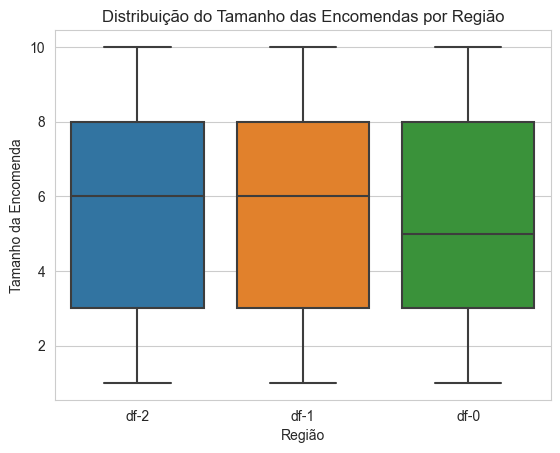

In [40]:
# Filtrar as regiões com tamanhos de encomendas menores que 100 (se necessário)
df = df[df['delivery_size'] < 12]

# Configurar o estilo do gráfico
with sns.axes_style('whitegrid'):
    # Criar o gráfico de distribuição do tamanho das encomendas por região
    grafico = sns.boxplot(data=df, x='region', y='delivery_size')
    # Definir título e rótulos dos eixos
    grafico.set(title='Distribuição do Tamanho das Encomendas por Região', xlabel='Região', ylabel='Tamanho da Encomenda')
    # Exibir o gráfico
    plt.show()


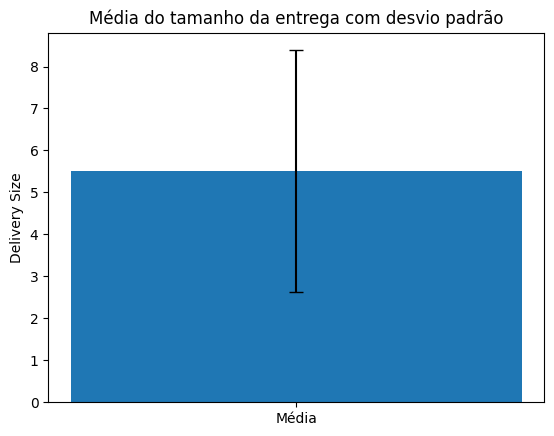

In [41]:
# Calculando a média e o desvio padrão
media = df['delivery_size'].mean()
desvio_padrao = df['delivery_size'].std()

# Criando o gráfico de barras
plt.bar('Média', media, yerr=desvio_padrao, capsize=5)
plt.ylabel('Delivery Size')
plt.title('Média do tamanho da entrega com desvio padrão')
plt.show()


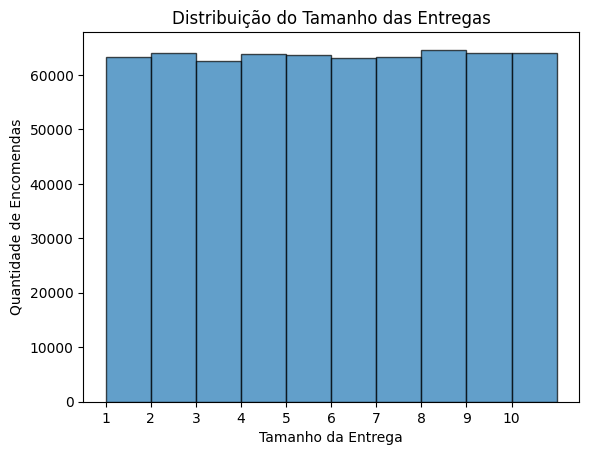

In [43]:
# Criando o histograma
plt.hist(df['delivery_size'], bins=range(1, 12), edgecolor='black', alpha=0.7)

# Adicionando rótulos e título
plt.xlabel('Tamanho da Entrega')
plt.ylabel('Quantidade de Encomendas')
plt.title('Distribuição do Tamanho das Entregas')

# Configurando os ticks do eixo x
plt.xticks(range(1, 11))

# Exibindo o histograma
plt.show()


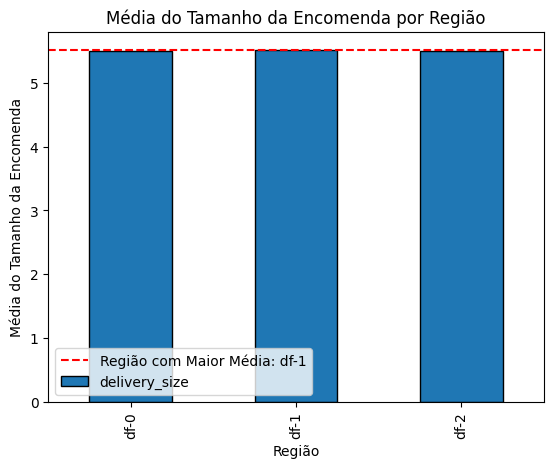

In [44]:
# Calcular a média do tamanho das encomendas por região
media_compra = df.groupby('region')['delivery_size'].mean()

# Encontrar a região com a maior média
regiao_media = media_compra.idxmax()

# Criar o gráfico de barras
media_compra.plot(kind='bar', edgecolor='black')

# Adicionar rótulos e título
plt.xlabel('Região')
plt.ylabel('Média do Tamanho da Encomenda')
plt.title('Média do Tamanho da Encomenda por Região')

# Destacar a região com a maior média
plt.axhline(y=media_compra[regiao_media], color='r', linestyle='--', label=f'Região com Maior Média: {regiao_media}')

# Exibir legenda
plt.legend()

# Mostrar o gráfico
plt.show()
